<h1>TAREA 8</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<p>Implementarunodelossiguientesalgortimos:</p>
<li>Algoritmo de umbralización multinevel de Otsu (Ref. 1).</li>
<li>Algoritmo para la umbralización multinivel basado en estadística recursiva (Ref. 2).</li>

<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>

In [9]:
%matplotlib inline
import cv2
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
from __future__ import division

img = cv2.imread('Fig/libro.jpg',0)
print "Listo"


Listo


kmax 8 255
82.3333333333 164.666666667


(<matplotlib.axes._subplots.AxesSubplot at 0x10fd5a050>,
 <matplotlib.text.Text at 0x10fea1610>)

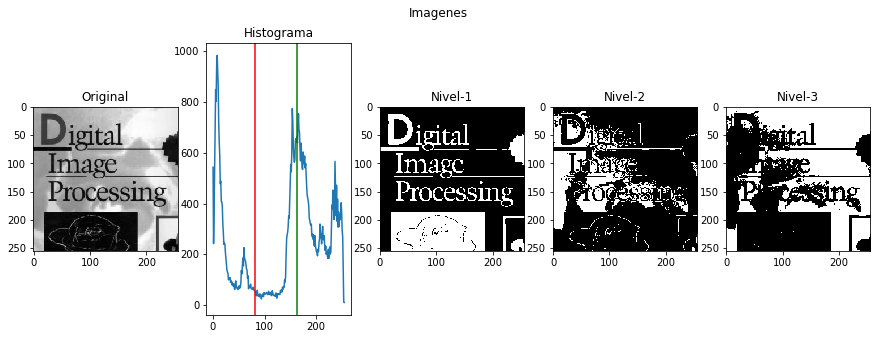

In [19]:
def otsu(img):
    # find normalized_histogram, and its cumulative distribution function
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    hist_norm = hist.ravel()/hist.max()
    Q = hist_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1
    for i in xrange(1,256):
        p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
        q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
        b1,b2 = np.hsplit(bins,[i]) # weights
        # finding means and variances
        m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
        v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
        # calculates the minimization function
        fn = v1*q1 + v2*q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
    # find otsu's threshold value with OpenCV function
    return thresh,hist

def mcom(k1,k2):
    val = 1/(k2-k1+1)
    k1 = int(np.rint(k1))
    k2 = int(np.rint(k2))
    print "KS:",k1,k2
    hist = cv2.calcHist([img],[0],None,[256],[0,255])
    sumat = hist[k1]+hist[k2]
    print "val",val*sumat
    return val*sumat

def otsu_ml(img):
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    kmax = np.abs(np.argmax(hist)-np.argmin(hist))
    print "kmax",np.argmax(hist),np.argmin(hist)
    k1 = kmax/3
    k2 = 2*kmax/3
    print k1,k2
    e1 = 100
    e2 = 100
    cont = 0
    while (e1<0 and e2):
        ei1 = e1
        ei2 = e2
        e1 = (mcom(0,k1)+mcom(k1,k2))/2 -k1
        e2 = (mcom(k1,k2)+mcom(k2,255))/2 -k2
        print "EROR:",e1,e2
        k1 = k1 + e1
        k2 = k2 + e2
        print "NKS:",k1,k2
        cont +=1
        
    return k1,k2

hist = cv2.calcHist([img],[0],None,[256],[0,256])
r1,r2 = otsu_ml(img)

r1 = int(r1)
r2 = int(r2)
otsu1 = cv2.inRange(img, 0, r1)
otsu2 = cv2.inRange(img, r1, r2)
otsu3 = cv2.inRange(img, r2, 255)

plt.figure(2,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(151), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(152), plt.plot(hist),plt.axvline(r1,color='r'),plt.axvline(r2,color='g'), plt.title('Histograma')
plt.subplot(153), plt.imshow(otsu1, cmap=plt.cm.gray), plt.title('Nivel-1')
plt.subplot(154), plt.imshow(otsu2, cmap=plt.cm.gray), plt.title('Nivel-2')
plt.subplot(155), plt.imshow(otsu3, cmap=plt.cm.gray), plt.title('Nivel-3')
